In [10]:
import numpy as np

from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from dataclasses import dataclass
from pathlib import Path

from scalebar import utils
from scalebar.core.estimation import Result


In [2]:
BLACK = 0
GRAY = 127
WHITE = 255

@dataclass
class Args:
    image_path: str

    roi_fraction: float = 0.15

In [3]:
def imshow(ims):

    if len(ims) <= 3:
        nrows, ncols = 1, len(ims)
    else:
        nrows = int(np.ceil(np.sqrt(len(ims))))
        ncols = int(np.ceil( len(ims) / nrows))

    fig, axs = plt.subplots(ncols=ncols, nrows=nrows,figsize=(16,9), squeeze=False)
    for i, (title, im, cmap) in enumerate(ims):
        ax = axs[np.unravel_index(i, axs.shape)]

        if isinstance(im, (list, tuple)):
            alpha = 1 / len(im)
            for _im, _cm in zip(im, cmap):
                ax.imshow(_im, cmap=_cm, alpha=alpha)
        else:
            ax.imshow(im, cmap=cmap)
        ax.set_title(title)

    return fig, axs

In [6]:


def main(args: Args):

    res = Result.new(args.image_path, roi_fraction=args.roi_fraction)
    images = res.images
    ROI = utils.hide_non_roi(images.binary, res.roi_fraction, 127)

    imshow([
        ("Original", images.original, None),
        ("B/W image", images.gray, plt.cm.gray),
        ("B/W image equalized", images.equalized, plt.cm.gray),
    ])

    imshow([
        ("Binarized", images.binary, plt.cm.gray),
        ("ROI to be masked", ROI, plt.cm.gray),
        ("Masked", images.masked, plt.cm.gray),
    ])


    # match, template = match_scalebar(bin_im_masked, template_size=temp_size)
    # x, y, w, h = find_scalebar(match, enlarge=temp_size)

    scalebar_crop = res.position.crop(images.equalized)

    fig, axs = imshow([
        ("Template Matches", (
            images.binary,
            res.match), (plt.cm.gray, plt.cm.viridis)),
        (f"Scalebar | {res.scale} px/mm", scalebar_crop, plt.cm.gray),
    ])

    ax = axs[np.unravel_index(1, axs.shape)]
    ys, xs = res.distances.corners.transpose(1, 0)
    ax.scatter(xs, ys, marker=".", c="red")



    # ax = axs[np.unravel_index(0, axs.shape)]
    # ax.add_patch(plt.Rectangle((x, y), width=w, height=h, fill=False))

    # scale = estimate(cv2.resize(scalebar_crop, None, None, 2, 2),
    #                  cv2.resize(matched_crop, None, None, 2, 2),
    #                  min_distance=size*2)
    # scale = estimate(scalebar_crop, matched_crop, min_distance=size)
    # scale = estimate(cv2.resize(scalebar_crop, None, None, 0.5, 0.5),
    #                  cv2.resize(matched_crop, None, None, 0.5, 0.5),
    #                  min_distance=size//2)
    # scale = estimate(cv2.resize(scalebar_crop, None, None, 0.25, 0.25),
    #                  cv2.resize(matched_crop, None, None, 0.25, 0.25),
    #                  min_distance=size//4)

    plt.show()
    plt.close()


  0%|          | 0/8 [00:00<?, ?it/s]

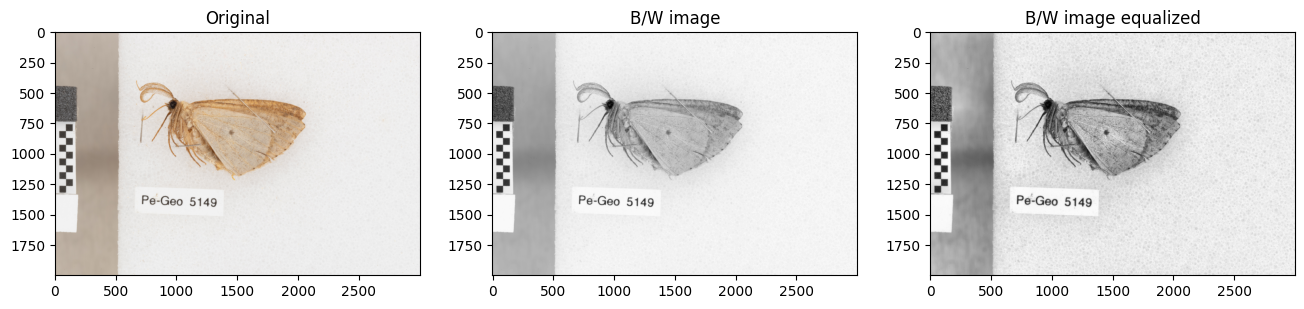

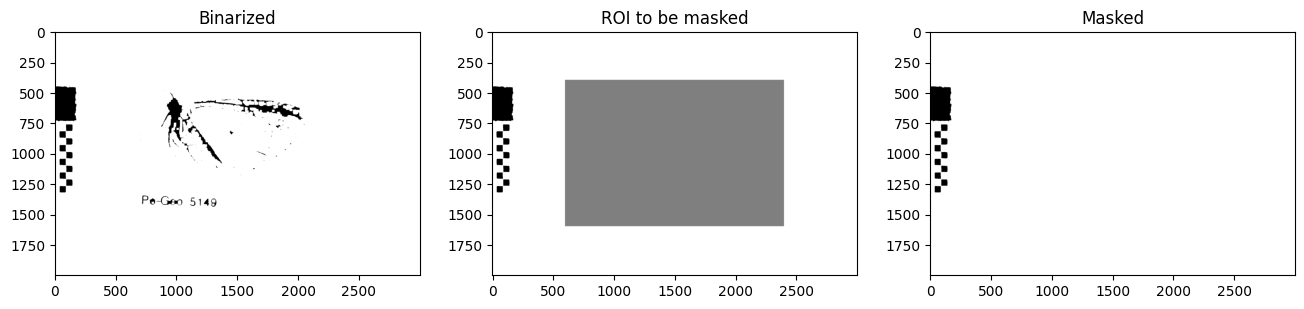

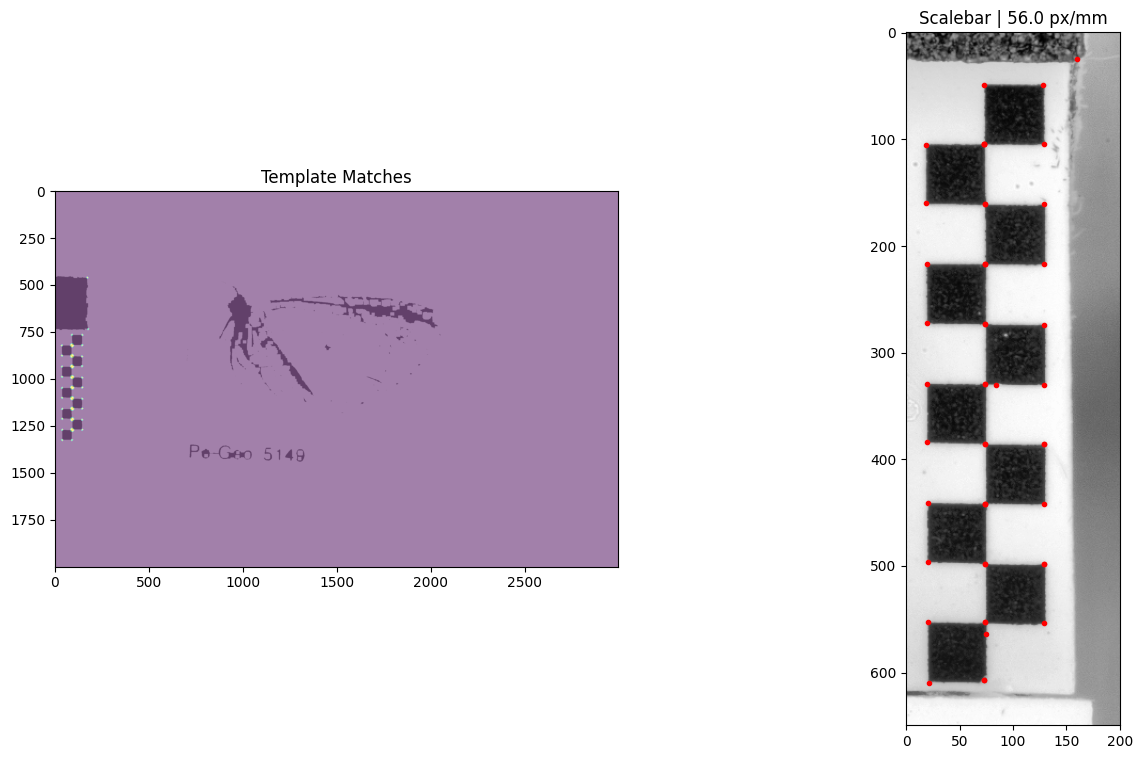

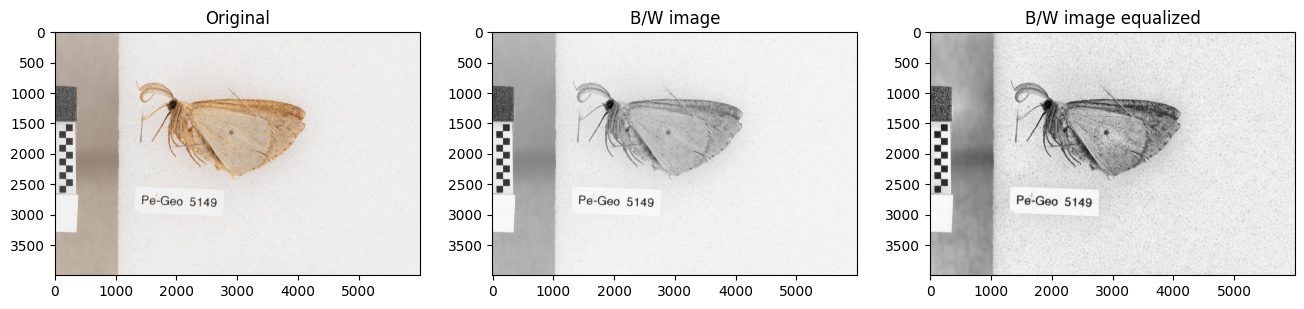

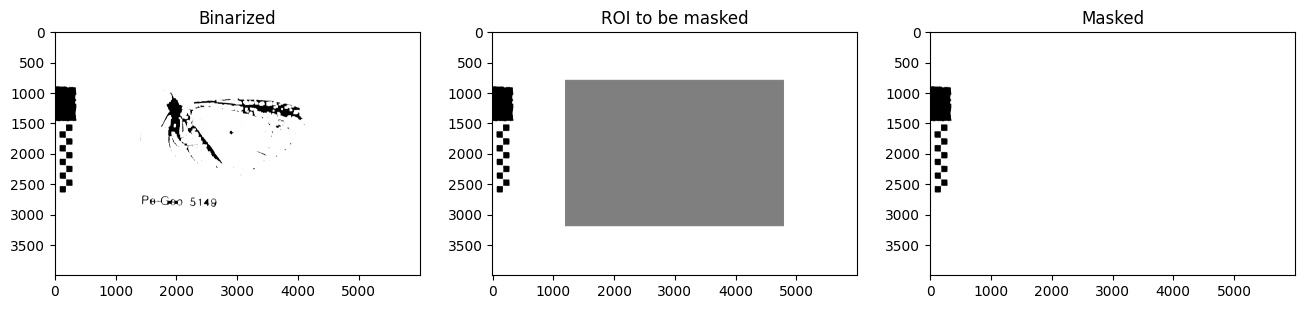

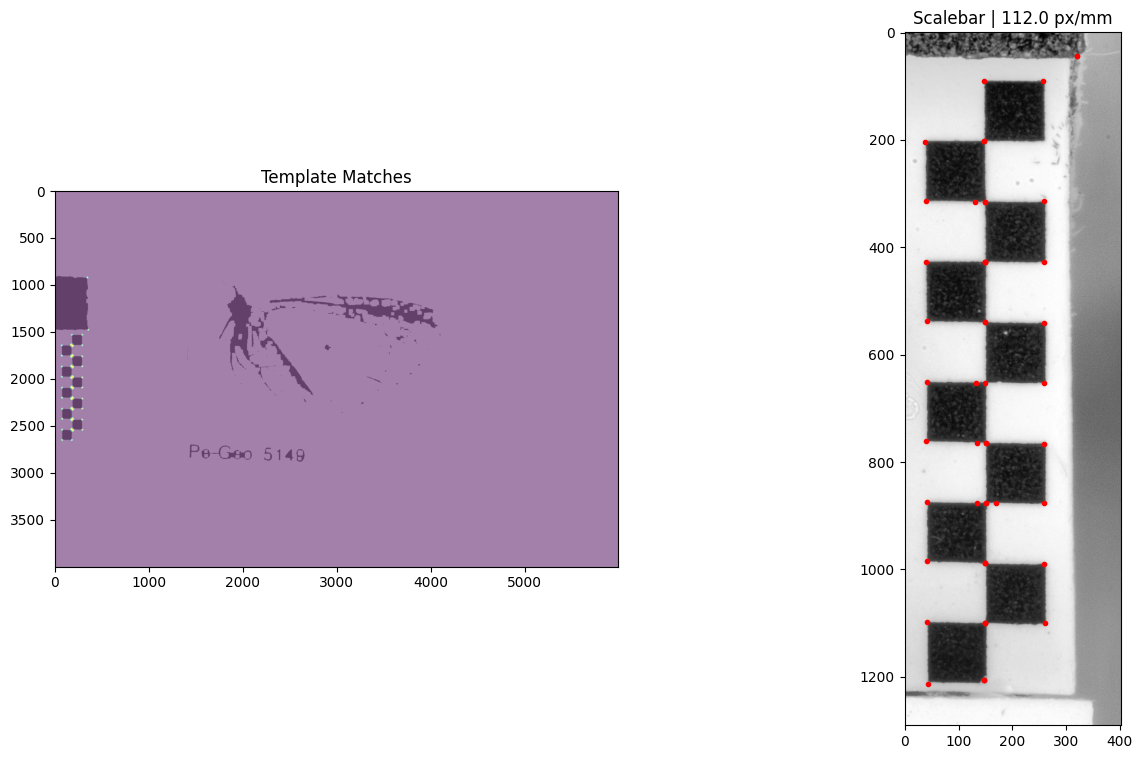

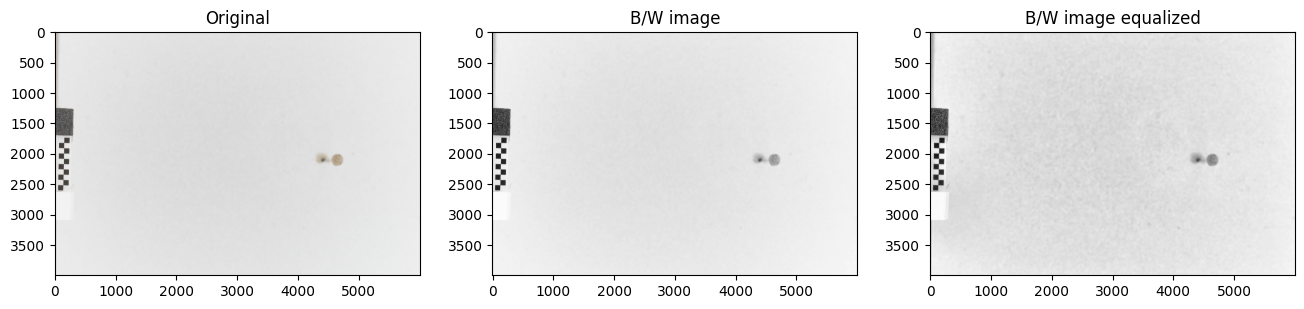

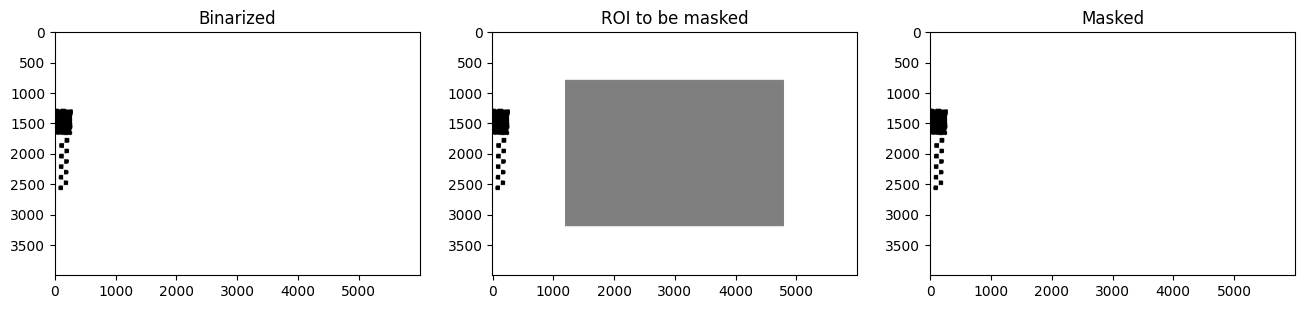

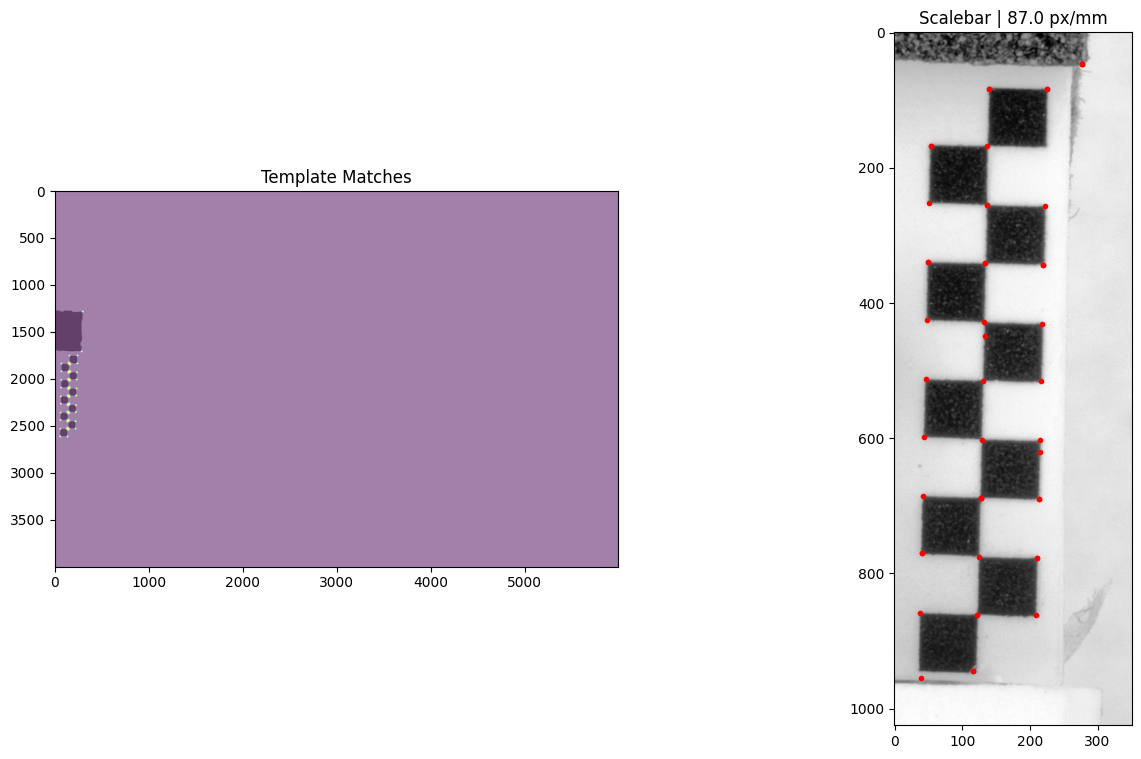

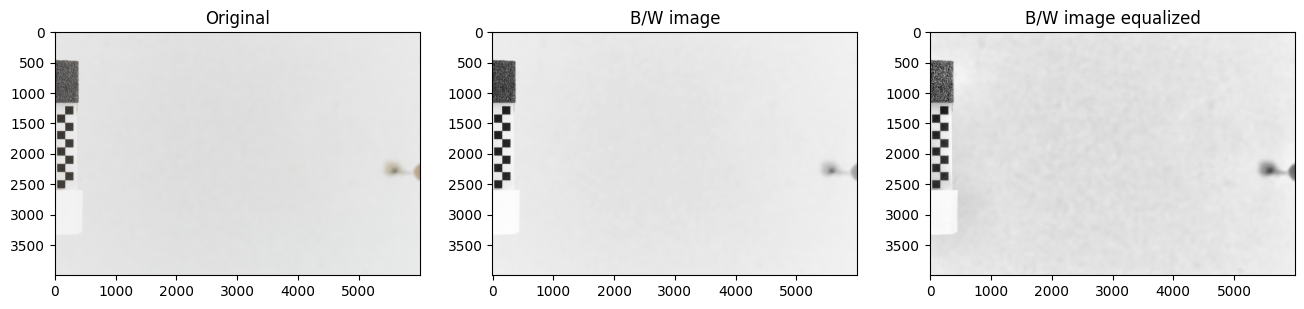

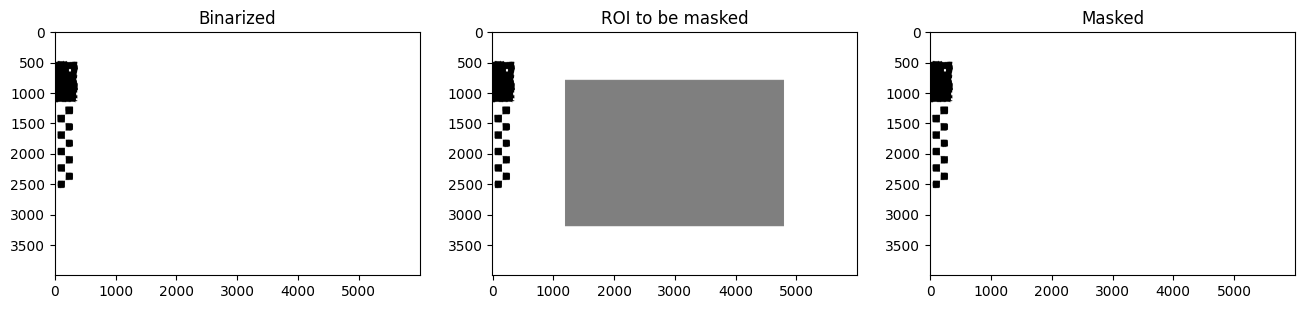

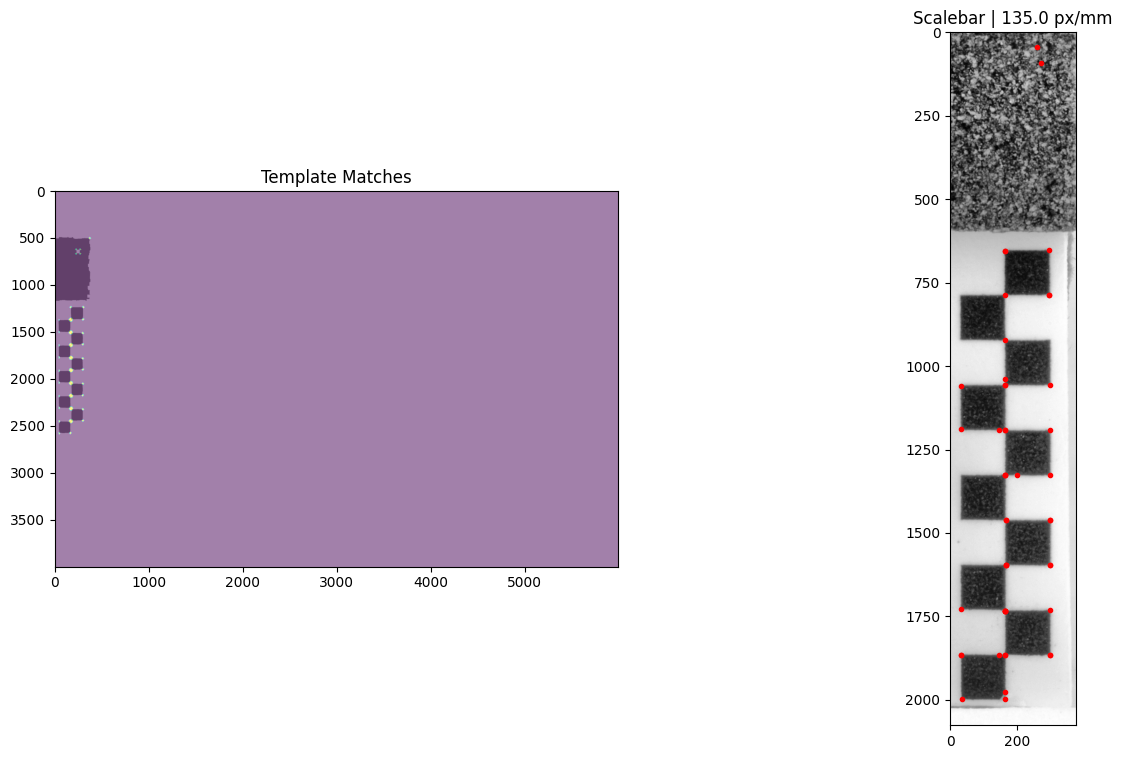

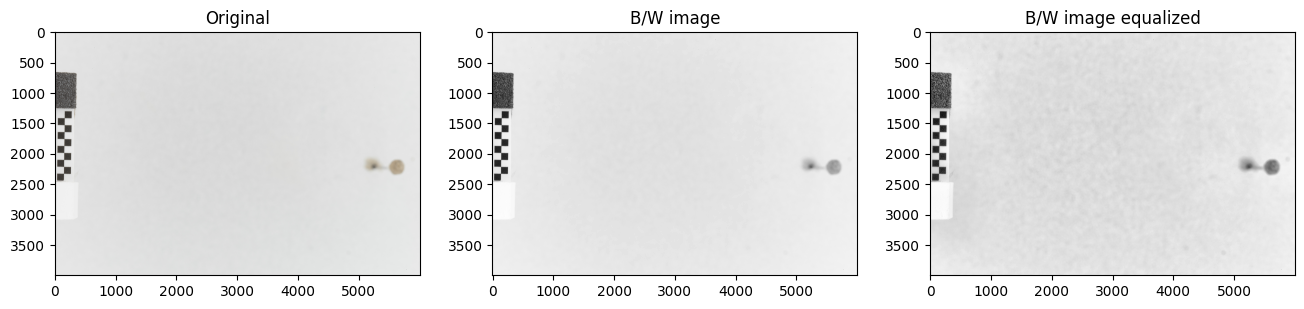

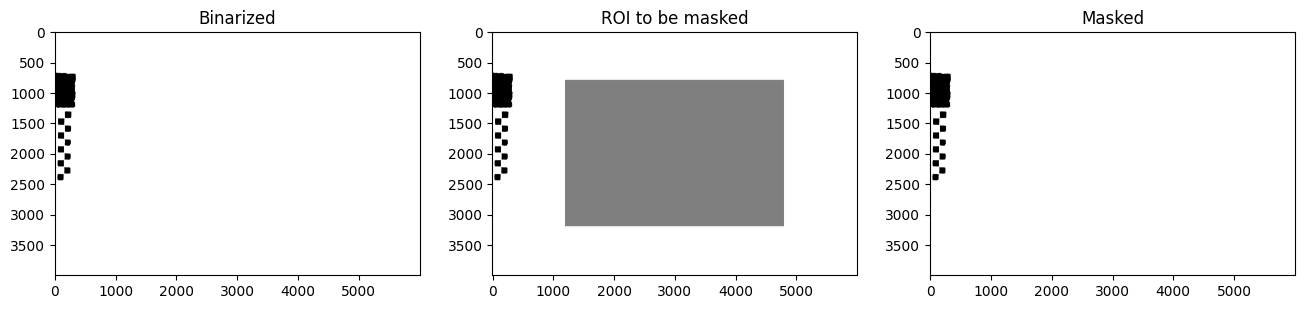

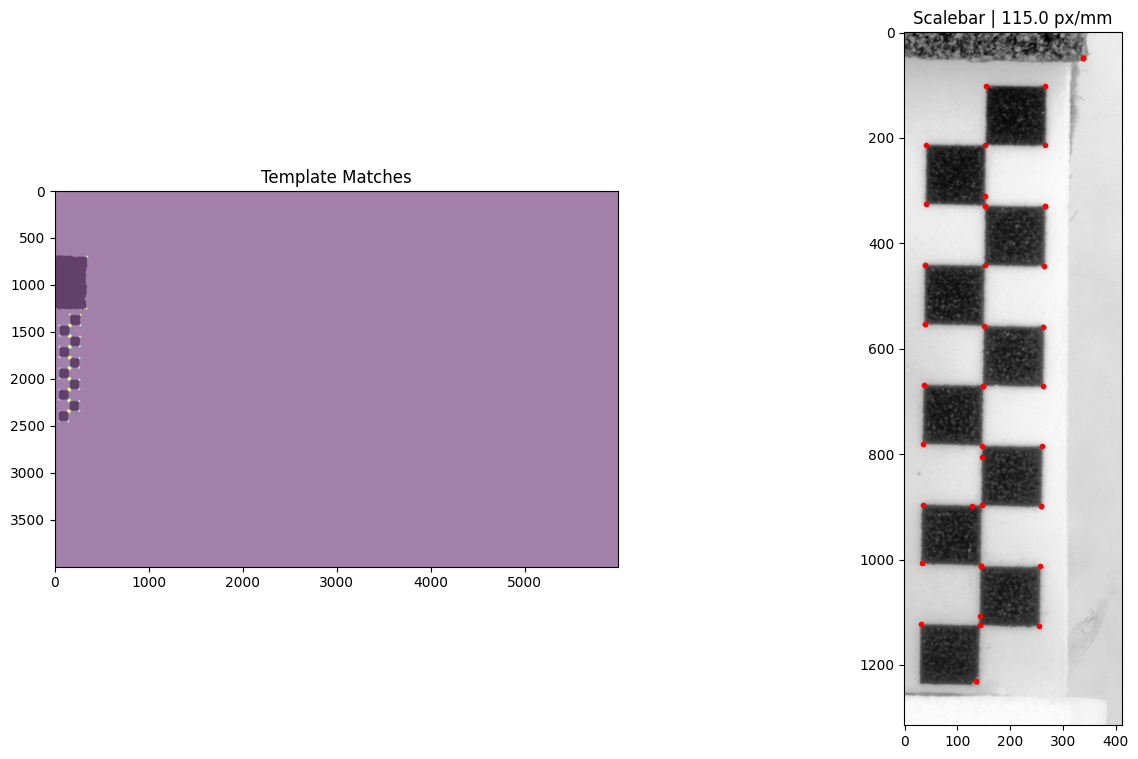

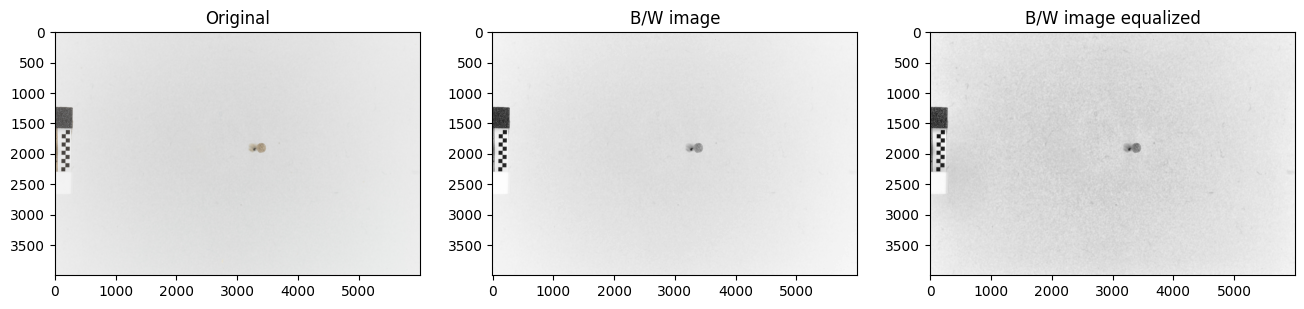

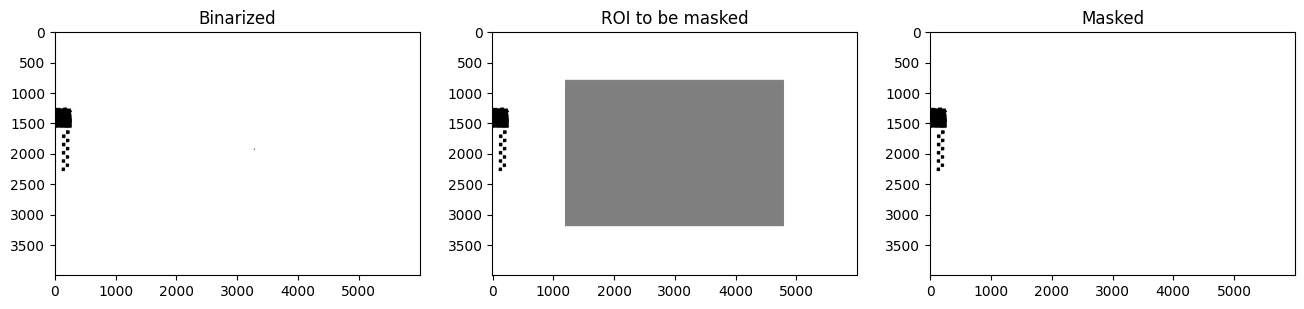

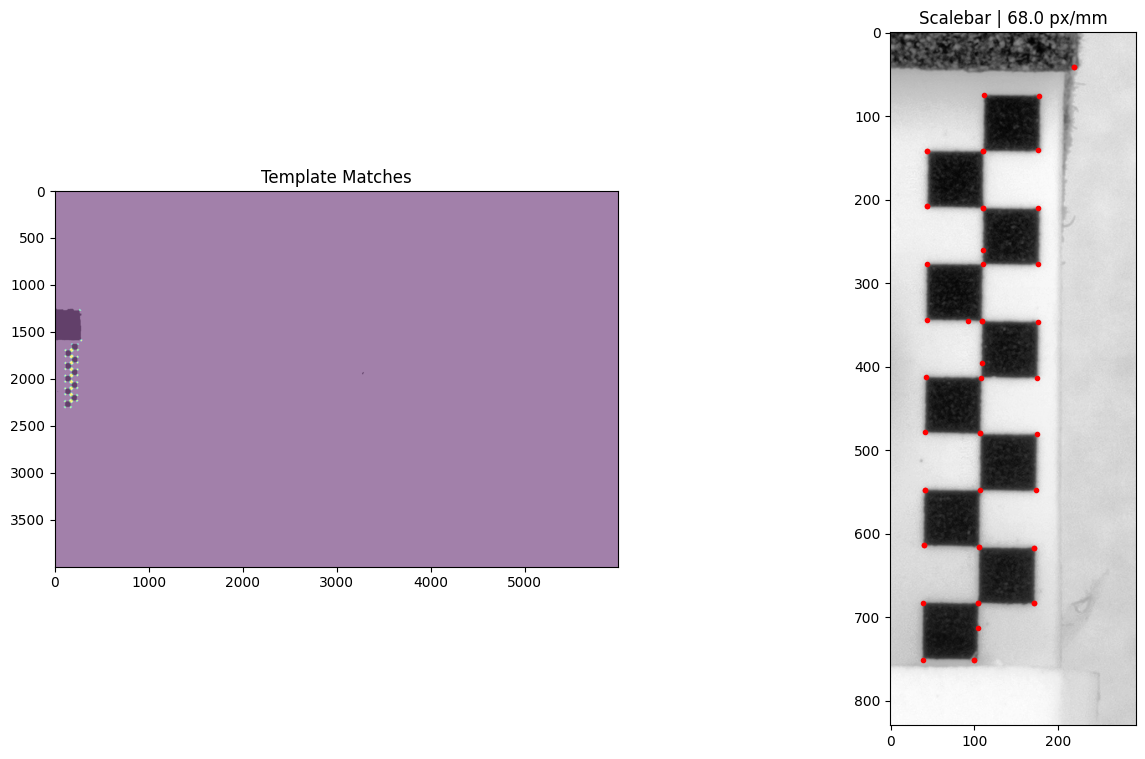

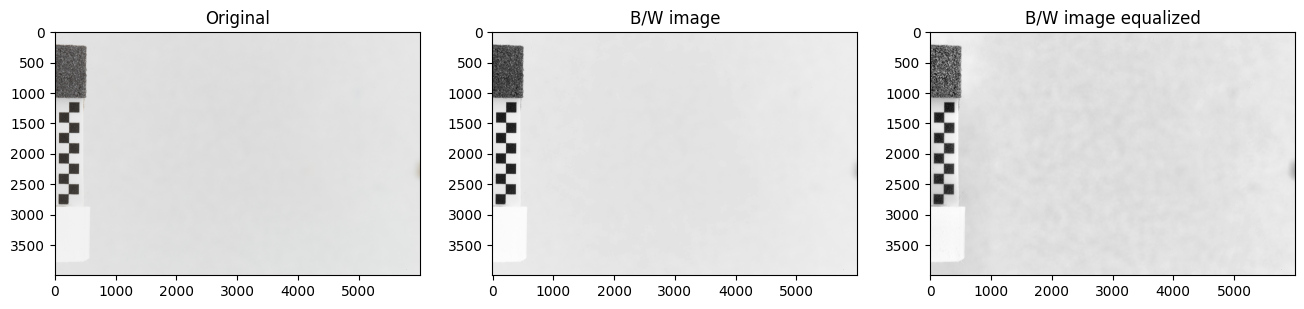

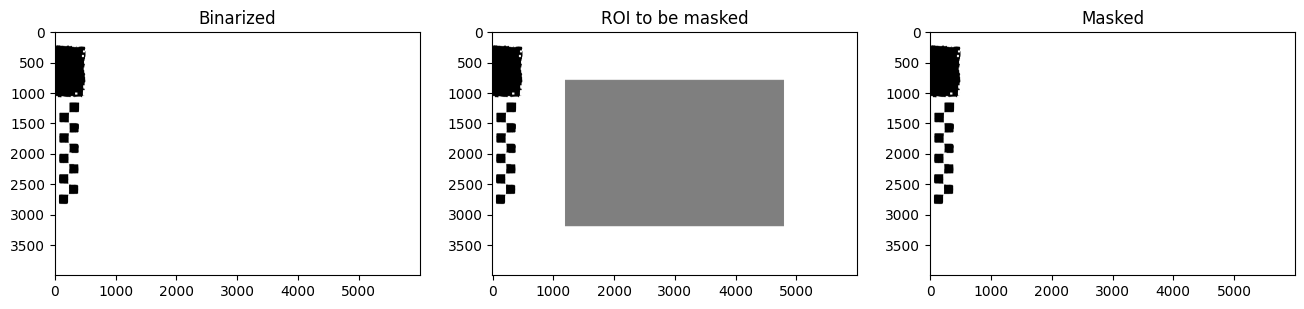

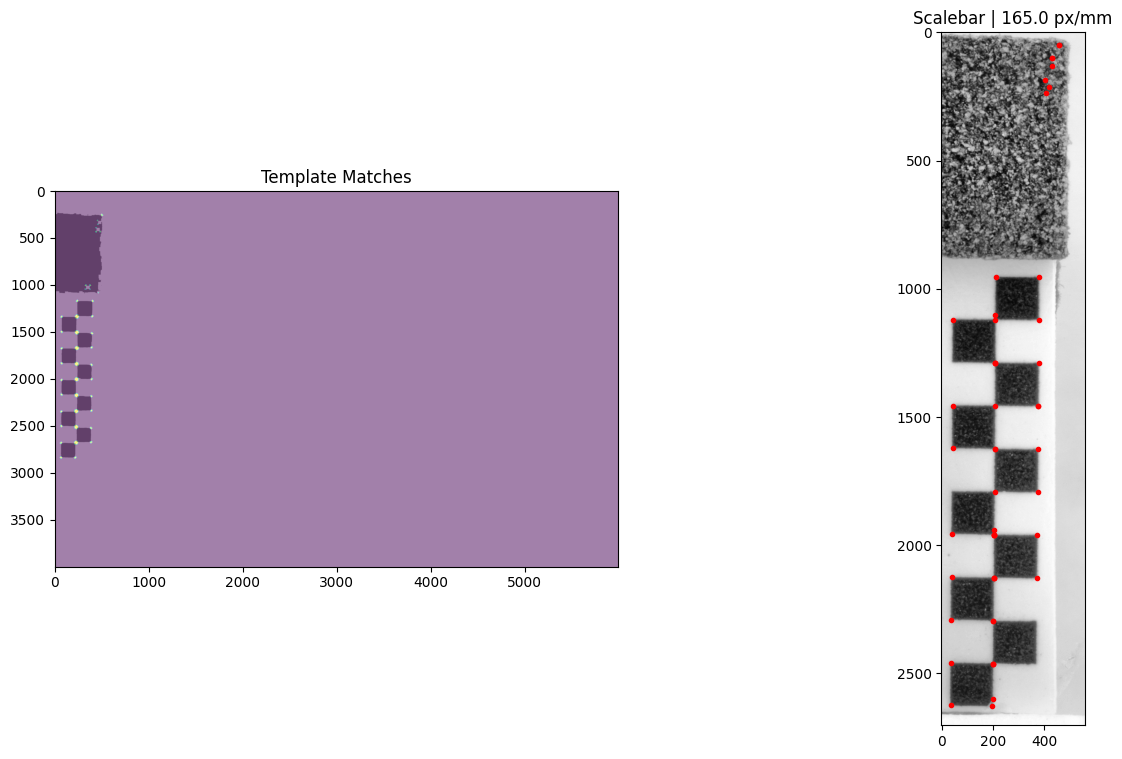

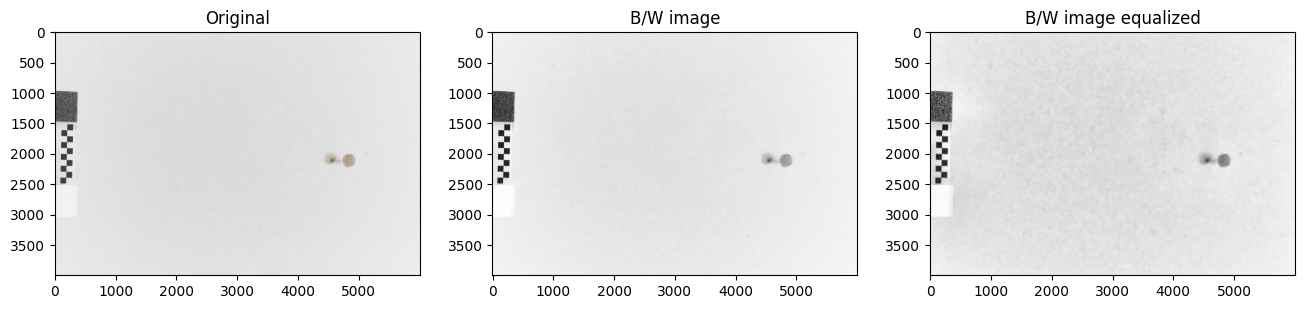

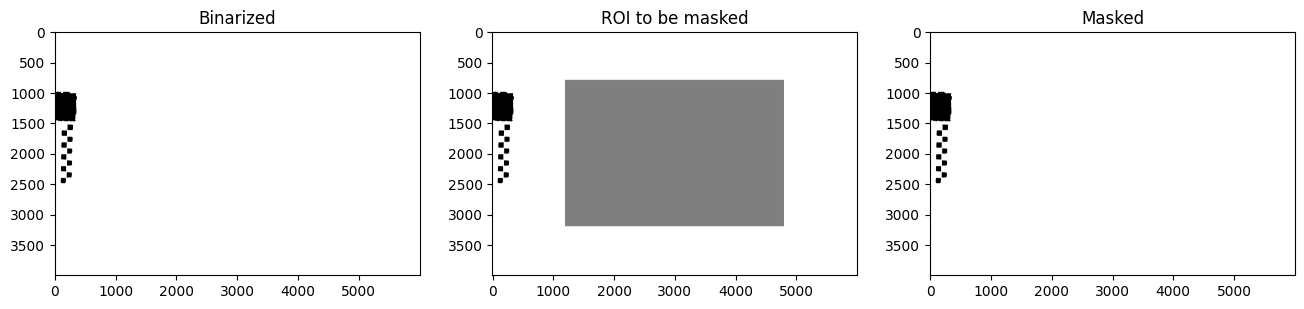

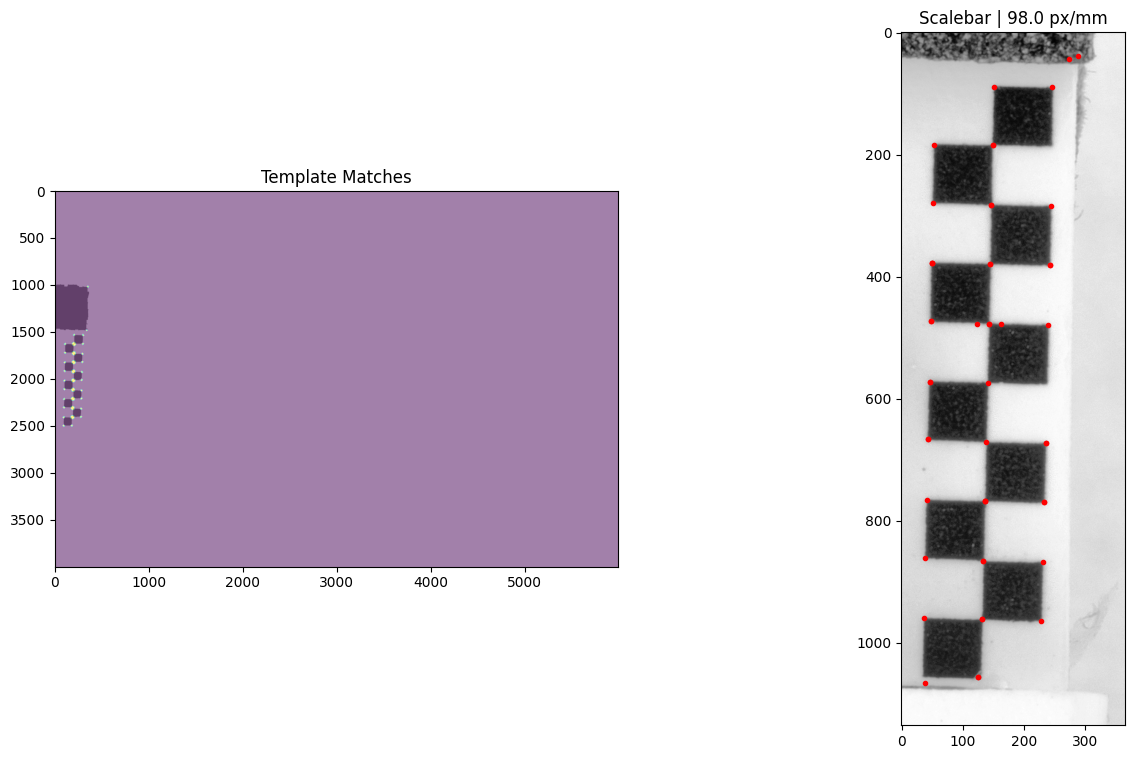

In [11]:

ims = [
    "../examples/Pe-Geo-5149u.jpg",
    "../examples/Pe-Geo-5149u-big.jpg",
    # "../examples/20240530_175508.jpg",
    # "../examples/20240530_174728.jpg",
    # "../examples/20240531_141321.jpg",
]

ims += list((Path.home() / "Data/datasets/mothseg/6_Masstabsbilder/").glob("*.jpg"))

for im in tqdm(ims):
    args = Args(im)
    main(args)